This notebook solves the 1D - convection equation using a finite volume method.  The method is 2nd order, called the *Lax - Wendroff* method.  The equation is:

$$\partial_t u + c\partial_x u = 0$$

In [1]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

In [2]:
#Numerical Parameters and Initial Conditions
Nx = 500
x = np.linspace(0.0,1.0,Nx + 1)
dx = 1/50.
xMid = x[:-1] + dx/2.
c=1.
xLeft = 0.
xRight = 0.



 For Lax - Wendfroff, we approximate the thing at the midpoint in time ($dx / 2$) as well... it's a second order method.

In [6]:
dt = 0.001
u = 0.5 * np.exp(-(x-0.5)**2/0.01)

U = np.zeros_like(u)
simEnd = 1
t = np.arange(0,simEnd,dt)

storage = [np.array(u)]
for n in range(len(t)):
    uBC = np.concatenate((np.array([u[-1]]), u, np.array([u[0]])))
    #print(uBC)
    for i in range(1,len(uBC)-2):
        FMinus = 1/2*(c*uBC[i-1] + c*uBC[i]) - dx/dt/2.*(uBC[i]-uBC[i-1])
        FPlus = 1/2*(c*uBC[i] + c*uBC[i+1]) - dx/dt/2.*(uBC[i+1]-uBC[i])
        u[i-1] = u[i-1] - (dt /dx )*(FPlus - FMinus)
        #print(FPlus - FMinus)
    storage.append(u)

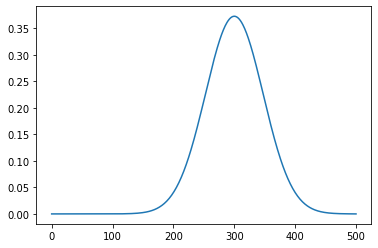

In [7]:
plt.plot(storage[100])
plt.show()
